# Satellite Image Classification With CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
import glob
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
cloudy = glob.glob("training_set/cloudy/*.jpg")
desert = glob.glob("training_set/desert/*.jpg")
green_area = glob.glob("training_set/green_area/*.jpg")
water = glob.glob("training_set/water/*.jpg")

In [54]:
cloudy_test = glob.glob("testing_set/cloudy/*.jpg")
desert_test = glob.glob("testing_set/desert/*.jpg")
green_area_test= glob.glob("testing_set/green_area/*.jpg")
water_test = glob.glob("testing_set/water/*.jpg")

In [55]:
print(f"Number of images in Training set are:\nCloudy:{len(cloudy)}\ndesert:{len(desert)}\ngreen_area:{len(green_area)}\nwater:{len(water)}")

Number of images in Training set are:
Cloudy:596
desert:575
green_area:462
water:468


In [56]:
print(f"Number of images in Training set are:\nCloudy_test:{len(cloudy_test)}\ndesert_test:{len(desert_test)}\ngreen_area_test:{len(green_area_test)}\nwater_test:{len(water_test)}")

Number of images in Training set are:
Cloudy_test:488
desert_test:416
green_area_test:456
water_test:334


In [57]:
image = []
label = []

for i in cloudy:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in desert:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in green_area:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in water:
    img = plt.imread(i)
    image.append(img)
    label.append(3)
    


In [58]:
label_dict = {0:'cloudy',1:'desert',2:'green_area',3:'water'}

In [59]:
image_test = []
label_test = []

for i in cloudy_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    
for i in desert_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in green_area_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)
    
for i in water_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

In [60]:
image , label = shuffle(image, label , random_state= 100)

In [61]:
image_test , label_test = shuffle(image_test, label_test , random_state= 100)

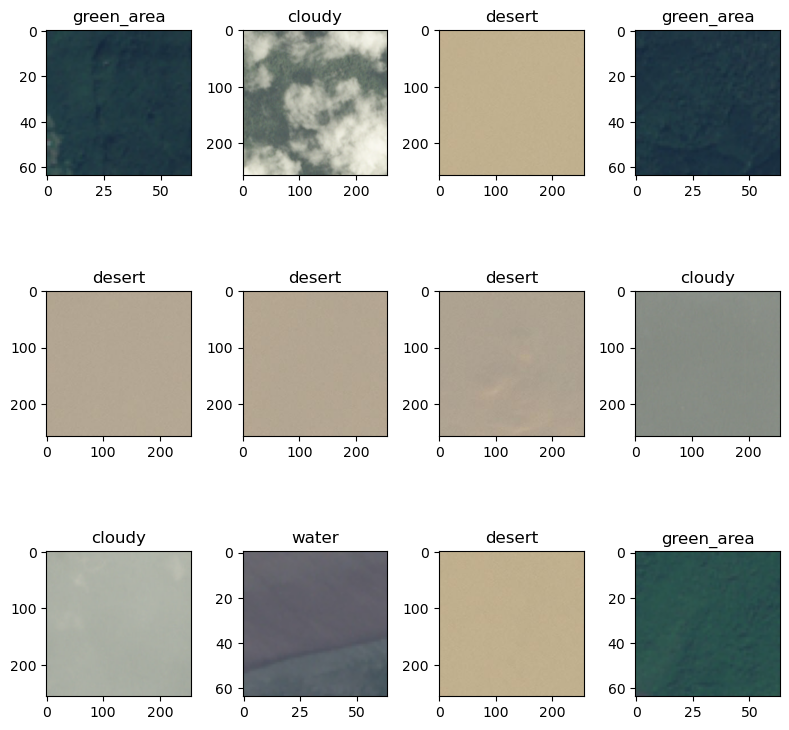

In [62]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label_dict[label[i]])
plt.tight_layout()

In [63]:
images = image[:10]

for i in images:
    print(i.shape)

(64, 64, 3)
(256, 256, 4)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 4)
(256, 256, 4)
(64, 64, 3)


In [65]:
X_train = []

for i in image:
    X_train.append(resize(i, (224,224,3)))

In [66]:
X_test = []

for i in image_test:
    X_test.append(resize(i, (224,224,3)))

In [67]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [68]:
y_train = np.array(label)
y_test = np.array(label_test)


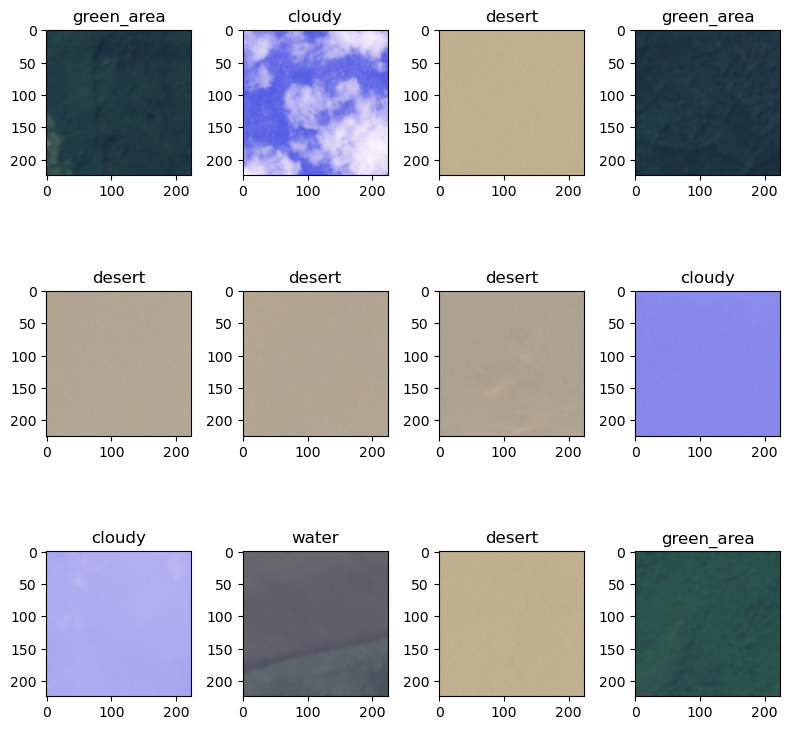

In [69]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    plt.title(label_dict[y_train[i]])
plt.tight_layout()

In [70]:
print(f"Shape of X_train is:{X_train.shape}\nShape of X_test is:{X_test.shape}\nShape of y_train is:{y_train.shape}\nShape of y_test is:{y_test.shape}")

Shape of X_train is:(2101, 224, 224, 3)
Shape of X_test is:(1694, 224, 224, 3)
Shape of y_train is:(2101,)
Shape of y_test is:(1694,)


In [71]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (224,224,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
    
])

In [72]:
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [74]:
model.fit(X_train,y_train,epochs= 1,validation_split=0.05)

63/63 [==============================] - 71s 1s/step - loss: 0.7179 - accuracy: 0.7303 - val_loss: 0.2130 - val_accuracy: 0.9057


In [75]:
model.evaluate(X_train,y_train)

66/66 [==============================] - 21s 310ms/step - loss: 0.2250 - accuracy: 0.9224


[0.22500407695770264, 0.9224178791046143]

In [76]:
predict = model.predict(X_test)

53/53 [==============================] - 20s 318ms/step


In [77]:
predict[0]

array([1.00000000e+00, 3.99408769e-03, 1.19703094e-04, 9.99999404e-01],
      dtype=float32)

In [78]:
y_pred  = [np.argmax(i) for i in predict]

In [79]:
y_pred[:5]

[0, 2, 1, 1, 2]

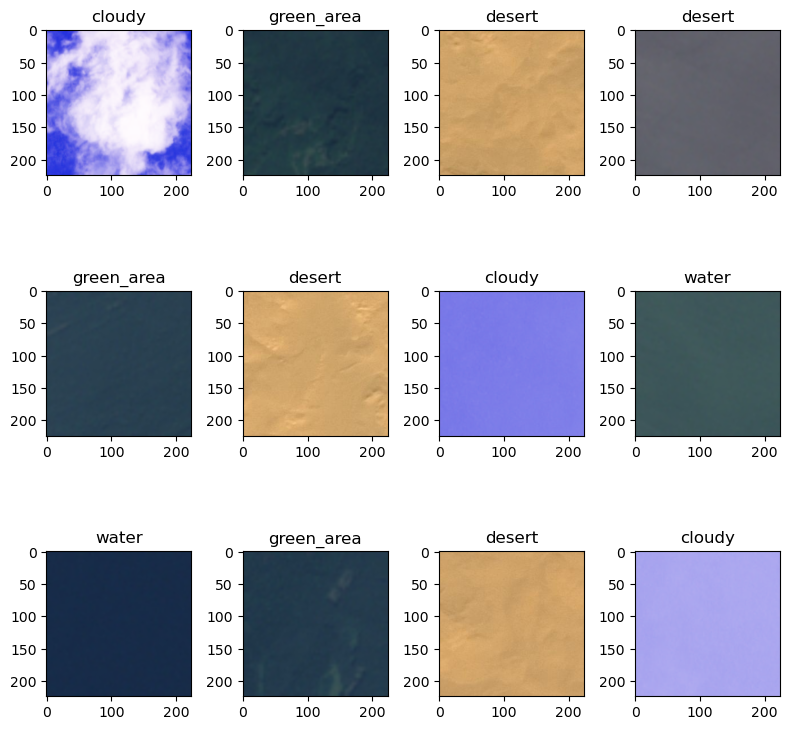

In [80]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(label_dict[y_pred[i]])
plt.tight_layout()

<Axes: >

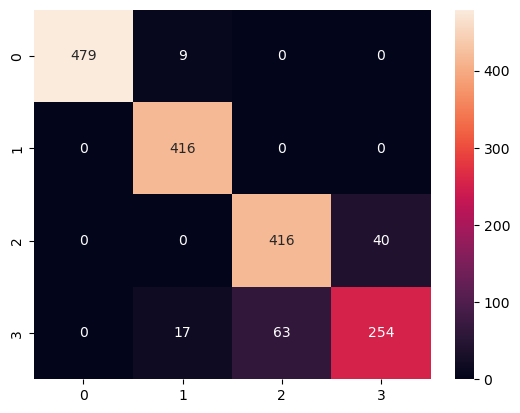

In [82]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       488
           1       0.94      1.00      0.97       416
           2       0.87      0.91      0.89       456
           3       0.86      0.76      0.81       334

    accuracy                           0.92      1694
   macro avg       0.92      0.91      0.91      1694
weighted avg       0.92      0.92      0.92      1694

